<a href="https://colab.research.google.com/github/YoonieJang/CS481_Intelligence-Text-Analysis/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [ ]:
# Q2
from scipy.spatial import distance
distance.cosine([2,2], [4,4])
#distance.cosine([2,2], [0,4])
#distance.cosine([2,2], [4,0])
#distance.cosine([2,2], [0,0])

0.0

In [ ]:
# Q3
q3_data = {'x1':[0,0.4,0.7,0.5,0.5,0.6,0.3,0.1,0.8,0.8],
        'x2':[0.6,0.4,0.8,0.2,0.8,0,0.2,0.6,0.8,0],
        'y':[-0.6,-0.6,0.6,1.8,1.2,1.2,1.4,0.6,1.8,1.6]
        }
convert_dict ={'x1':float, 'x2':float,'y':float}
q3_df = pd.DataFrame(q3_data)
q3_df= q3_df.astype(convert_dict)
print(q3_df)

    x1   x2    y
0  0.0  0.6 -0.6
1  0.4  0.4 -0.6
2  0.7  0.8  0.6
3  0.5  0.2  1.8
4  0.5  0.8  1.2
5  0.6  0.0  1.2
6  0.3  0.2  1.4
7  0.1  0.6  0.6
8  0.8  0.8  1.8
9  0.8  0.0  1.6


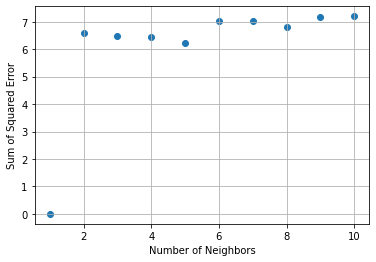

In [ ]:
x = q3_df[['x1','x2']]
y = q3_df['y']
result = pd.DataFrame()

for i in range(len(q3_df)):
  kNNSpec = KNeighborsRegressor(n_neighbors=(i+1),
                                metric='chebyshev')
  nbrs=kNNSpec.fit(x,y)
  pred_y = nbrs.predict(x)
  error_y = y-pred_y
  see_y  = np.sum(np.absolute(error_y))
  result= result.append([[(i+1),see_y]],ignore_index=True)

result = result.rename(columns={0:'Number of Neighbors', 1: 'Sum of Squared Error'})  
plt.scatter(result['Number of Neighbors'],result['Sum of Squared Error'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Sum of Squared Error')
plt.grid(axis='both')
plt.show()

In [ ]:
# Q5
# silhouette value does not change. it means how the clusters are close to each other.

In [ ]:
   
  crosstab =np.array(pd.crosstab(index  = var1,columns=var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
  

In [ ]:
# Q7
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
  obsCount = pd.crosstab(index = var1, columns=var2, margins = False,dropna=True)
  val1N = obsCount.shape[0]
  val2N = obsCount.shape[1]
  cTotal = obsCount.sum(axis = 1)
  rTotal = obsCount.sum(axis = 0)
  nTotal = np.sum(rTotal)
  expCount = np.outer(cTotal, (rTotal/nTotal))
  chiSqStat=((obsCount-expCount)**2/expCount).to_numpy().sum()
  cramers_V=np.sqrt(chiSqStat/((nTotal)*min(val1N-1,val2N-1)))
  return cramers_V

q7_data = {'Row':[],'Column':[]}
q7_data['Row'].extend(['A']*(4340+5403+2456+353))
q7_data['Column'].extend([1]*(4340))
q7_data['Column'].extend([2]*(5403))
q7_data['Column'].extend([3]*(2456))
q7_data['Column'].extend([4]*(353))
q7_data['Row'].extend(['B']*(8095+16156+10798+2371))
q7_data['Column'].extend([1]*(8095))
q7_data['Column'].extend([2]*(16156))
q7_data['Column'].extend([3]*(10798))
q7_data['Column'].extend([4]*(2371))
q7_data['Row'].extend(['C']*(4761+14154+14103+4597))
q7_data['Column'].extend([1]*(4761))
q7_data['Column'].extend([2]*(14154))
q7_data['Column'].extend([3]*(14103))
q7_data['Column'].extend([4]*(4597))
q7_data['Row'].extend(['D']*(813+3636+5307+2657))
q7_data['Column'].extend([1]*(813))
q7_data['Column'].extend([2]*(3636))
q7_data['Column'].extend([3]*(5307))
q7_data['Column'].extend([4]*(2657))
q7_df=pd.DataFrame(q7_data)
print(cramers_V(q7_df['Row'],q7_df['Column']))

0.16987747146810855


In [ ]:
# Q9
from scipy import stats
y_q9 = ['non']*14 + ['event']*6
y_q9=np.array(y_q9)

predProbY = np.array([0.0814,0.1197,0.1969,0.3505,0.3878,0.3940,0.4828,0.4889,0.5587,0.5614,0.6175,0.6342,0.6527,0.6668,0.4974,0.6732,0.6744,0.6836,0.7475,0.7828])
fpr, tpr, thresholds = metrics.roc_curve(y_q9,predProbY,pos_label ='event')

stats.kstest(pred_y, 'norm')
thresholds[2]


0.6732

In [ ]:
# Q11
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Q11.csv']))

Saving Q11.csv to Q11.csv


In [ ]:
df[(df['Gender']=='Female')&(df['MaritalStatus']=='Unmarried')&(df['Retired']=='Yes')]
df

,ActiveLifestyle,Gender,MaritalStatus,Retired,CreditCard
0,No,Male,Married,No,American Express
1,No,Male,Unmarried,No,American Express
2,No,Male,Unmarried,No,Visa
3,Yes,Female,Married,No,American Express
4,No,Male,Married,No,Discover
...,...,...,...,...,...
4962,Yes,Male,Unmarried,No,Discover
4963,No,Male,Married,No,MasterCard
4964,Yes,Male,Unmarried,No,American Express
4965,Yes,Female,Unmarried,No,MasterCard


In [ ]:
# Reorder the categories in ascending order of frequencies
# Create dummy indicators for the categorical input feature
data_q11=df.dropna()

catFreq = data_q11['CreditCard'].value_counts()
catFreq = catFreq.sort_values(ascending = True)
newCat = catFreq.index
u = data_q11['CreditCard'].astype('category')
xCat = pd.get_dummies(u.cat.reorder_categories(newCat))


# Reorder the categories in descending order of frequencies of the target field
catFreq = data_q11['CreditCard'].value_counts()
catFreq = catFreq.sort_values(ascending = False)
newCat = catFreq.index
u = data_q11['CreditCard'].astype('category')
y = u.cat.reorder_categories(newCat)
print('Target Categories:\n', y.cat.categories)

Target Categories:
 Index(['Discover', 'Visa', 'MasterCard', 'American Express', 'Others'], dtype='object')


In [ ]:
idx=x[(x['Gender']=='Female')&(x['MaritalStatus']=='Unmarried')&(x['Retired']=='Yes')]
idx

,Gender,MaritalStatus,Retired


In [ ]:
df

,ActiveLifestyle,Gender,MaritalStatus,Retired,CreditCard
0,No,Male,Married,No,American Express
1,No,Male,Unmarried,No,American Express
2,No,Male,Unmarried,No,Visa
3,Yes,Female,Married,No,American Express
4,No,Male,Married,No,Discover
...,...,...,...,...,...
4962,Yes,Male,Unmarried,No,Discover
4963,No,Male,Married,No,MasterCard
4964,Yes,Male,Unmarried,No,American Express
4965,Yes,Female,Unmarried,No,MasterCard


In [ ]:
from sklearn.linear_model import LogisticRegression
x= df[['Gender','MaritalStatus','Retired']]
idx=x.index[(x['Gender']=='Female')&(x['MaritalStatus']=='Unmarried')&(x['Retired']=='Yes')]
print('idx=',idx)
y = df[['CreditCard']]
x.Gender[x.Gender=='Male']=1
x.Gender[x.Gender=='Female']=0
x.MaritalStatus[x.MaritalStatus=='Unmarried']=0
x.MaritalStatus[x.MaritalStatus=='Married']=1
x.Retired[x.Retired=='No']=0
x.Retired[x.Retired=='Yes']=1
y.CreditCard[y.CreditCard=='American Express']=0  
y.CreditCard[y.CreditCard=='Discover']=1  
y.CreditCard[y.CreditCard=='MasterCard']=2
y.CreditCard[y.CreditCard=='Visa']=3
y.CreditCard[y.CreditCard=='Others']=4
x=x.astype('category')
idx=x[(x['Gender']==0)&(x['MaritalStatus']==0)&(x['Retired']==1)]

y=y.squeeze().astype('category')


lr=LogisticRegression().fit(x,y)
pred_proba = lr.predict_proba(idx)
pred_proba

idx= Int64Index([  13,   28,   80,  132,  155,  178,  260,  269,  273,  284,
            ...
            4713, 4770, 4784, 4804, 4821, 4836, 4882, 4889, 4902, 4919],
           dtype='int64', length=215)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


array([[0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739],
       [0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739],
       [0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739],
       ...,
       [0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739],
       [0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739],
       [0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739]])

In [ ]:
pred_proba[[0]]

array([[0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739]])

In [ ]:
pred_proba[[1]]

array([[0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739]])

In [ ]:
pred_proba[[2]]

array([[0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739]])

In [ ]:
pred_proba[3]

array([0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739])

In [ ]:
pred_proba[4]

array([0.13783855, 0.19484485, 0.28696827, 0.30904094, 0.07130739])